# Prediction des défauts de paiement de cartes de crédit

Nous allons utiliser le jeu de données "Default of Credit Card Clients" disponible sur le site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). Source: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Ce jeu de données contient des informations sur les défauts de paiement, les facteurs démographiques, les données de crédit, l'historique des paiements et les factures de cartes de crédit de 30 000 clients à Taiwan d'avril 2005 à septembre 2005.

Le jeu de données contient 25 variables :

- **ID** : ID client
- **LIMIT_BAL** : Montant du crédit accordé en dollar NT
- **SEX** : Le genre du client (1 = homme, 2 = femme)
- **EDUCATION** : Niveau d'éducation (1 = cycle master/doctorat, 2 = université, 3 = lycée, 4 = autre)
- **MARRIAGE** : Etat matrimonial (1 = marié, 2 = célibataire, 3 = autre)
- **AGE** : Age
- **PAY_0** : Etat de remboursement en septembre 2005 (-1 = paiement effectué, 1 = paiement en retard de 2 mois, ..., 9 = paiement en retard de 9 mois et plus)
- **PAY_2** : Etat de remboursement en août 2005
- **PAY_3** : Etat de remboursement en juillet 2005
- **PAY_4** : Etat de remboursement en juin 2005
- **PAY_5** : Etat de remboursement en mai 2005
- **PAY_6** : Etat de remboursement en avril 2005
- **BILL_AMT1** : Montant de la facture en septembre 2005 (en dollar NT)
- **BILL_AMT2** : Montant de la facture en août 2005
- **BILL_AMT3** : Montant de la facture en juillet 2005
- **BILL_AMT4** : Montant de la facture en juin 2005
- **BILL_AMT5** : Montant de la facture en mai 2005
- **BILL_AMT6** : Montant de la facture en avril 2005
- **PAY_AMT1** : Montant du paiement précédent en septembre 2005 (en dollar NT)
- **PAY_AMT2** : Montant du paiement précédent en août 2005
- **PAY_AMT3** : Montant du paiement précédent en juillet 2005
- **PAY_AMT4** : Montant du paiement précédent en juin 2005
- **PAY_AMT5** : Montant du paiement précédent en mai 2005
- **PAY_AMT6** : Montant du paiement précédent en avril 2005
- **default.payment.next.month** : Défaut de paiement en mai 2005 (1 = oui, 0 = non)

## Preprocessing
Le jeu de données est au format XLS, nous allons le convertir en CSV pour pouvoir l'utiliser. On va également supprimer la première ligne qui contient les noms des colonnes (X1,...,Y).

Je commence par installer xlrd pour pouvoir lire le fichier XLS:
<br>
<br>

In [40]:
import sys

import numpy as np
!{sys.executable} -m pip install xlrd

In [41]:
import pandas as pd

# on enlève la première ligne qui contient les noms des colonnes et la première colonne qui contient les ID :
df = pd.read_excel('default of credit card clients.xls', skiprows=[0], usecols="B:Y")
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.to_csv('default_credit_card_clients.csv', index=False)

<br>
On peut maintenant lire notre fichier CSV, voici les 5 premières lignes : <br>

In [42]:
df = pd.read_csv('default_credit_card_clients.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<br>
On peut constater que le jeu de données ne possède que des valeurs numériques, par ailleurs, notre classe d'intérêt est <code>DEFAULT</code>, c'est la classe que l'on devra prédire. Comme énoncé plus haut, 1 signifie que le client est en situation de défaut de paiement, 0 signifie que le client a bien réglé ses factures. <br>
Vérifions maintenant que notre fichier ne possède pas de valeurs manquantes : <br>

In [43]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

On va maintenant explorer nos données pour voir ce qu'il s'y passe. On va commencer par regarder la répartition de notre classe d'intérêt <code>default</code> : <br>

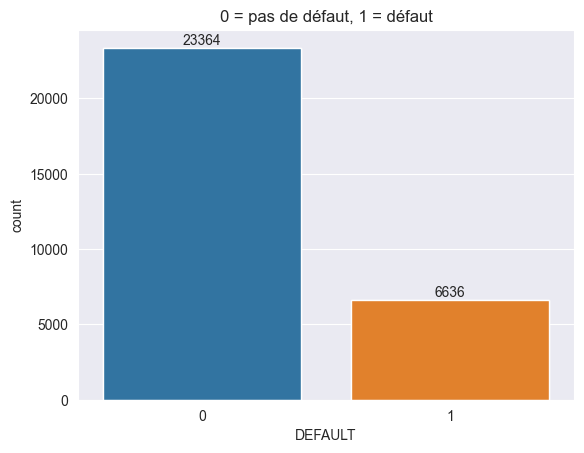

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='DEFAULT', data=df).bar_label(sns.countplot(x='DEFAULT', data=df).containers[0])
plt.title('0 = pas de défaut, 1 = défaut')
plt.show()

On constate que nos données sont très déséquilibrées. Il y a beaucoup plus de clients qui ont réglé leurs factures (<b>23364</b>) que de clients en situation de défaut de paiement (<b>6636</b>).

Regardons la matrice de correlation :
<br>

Text(0.5, 1.0, 'Matrice de correlation')

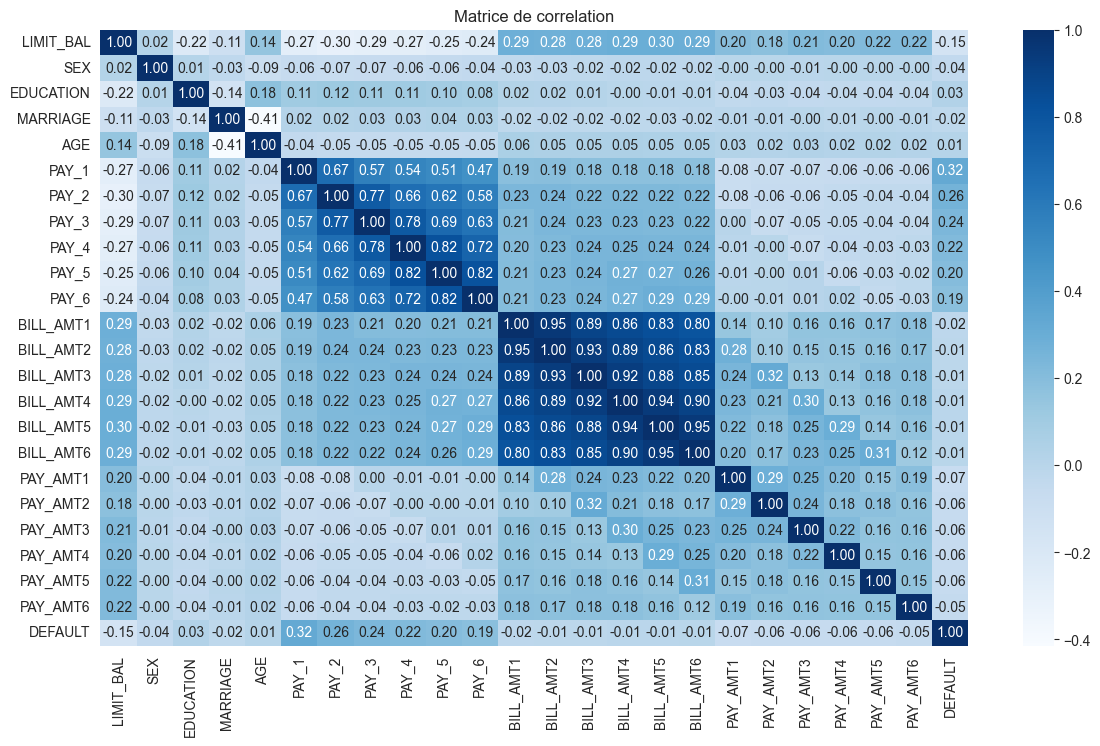

In [45]:
corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Matrice de correlation')

On constate plusieurs choses ici :
- les variables <code>PAY_1</code> à <code>PAY_6</code> ont les correlations positives les plus élevées avec <code>default</code>. La valeur la plus élevée est de <code>0.32</code> pour <code>PAY_1</code>.
- la variable <code>LIMIT_BAL</code> a une correlation de <code>0.15</code> avec <code>default</code>, c'est la corrélation négative la plus élevée.
- les variables <code>PAY_AMT1</code> à <code>PAY_AMT6</code> ont elles aussi des correlations négatives avec <code>default</code>.

Cela signifie pour le premier élément que plus les paiements ont de retard, plus le risque de défaut de paiement est élevé, <code>PAY_1</code> est <b>la variable la plus prédictive</b> du défaut de paiement. Ensuite, plus le montant du crédit accordé est élevé et moins il y a de risque de défaut de paiement. Les montants des paiements précédents ont quant à eux peu d'incidence sur le défaut de paiement.
<br>
<h3>Hypothèses</h3>
L'expression "on ne prête qu'aux riches" semble s'appliquer ici, dans la vie réelle les montants élevés de crédit ne sont généralement accordés qu'aux personnes ayant le plus de garanties de le rembourser, en effet les banquiers effectuent de fortes vérifications lorsque la demande de crédit est élevée. Il n'en est pas de même pour les petits montants, on peut penser aux crédits à la consommation, ainsi les données que nous avons confirment qu'en effet, plus le crédit est élevé, plus le risque de défaut de paiement est faible, les clients possédant ces crédits élevés sont plus à même de parvenir à les rembourser contrairement aux clients effectuant de petits crédits.

Par ailleurs, concernant les variables relatives aux délais de remboursement, on a constaté que le premier retard de paiement était un très fort indicateur du défaut de paiement. Ce premier retard est ainsi un fort signal aux banquiers concernant la possible insolvabilité du client, tous les retards suivants confirment que le risque de défaut du client est élevé. Les banquiers devraient ainsi particulièrement être attentifs à ces retards de paiement.
<br>
<br>
Regardons ces données :

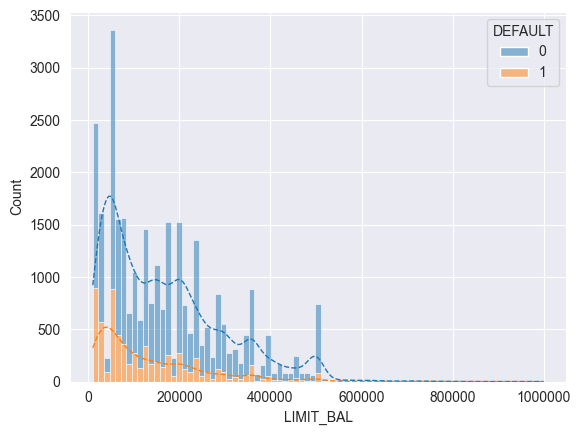

In [46]:
sns.histplot(data=df, x="LIMIT_BAL", hue="DEFAULT", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':1})
plt.ticklabel_format(style="plain")


Taux de défaut de paiement au sein de <code>PAY_1</code> :

In [47]:
pay_mean = df.groupby('PAY_1').agg({'DEFAULT':'mean'})